# <center> EE5708: Data Analytics Laboratory </center>
# <center> Assignment 4: Decision Trees </center>
## <center> Aman Kumar: EE21B013 </center>
### Loading necessary packages

In [5]:

import zipfile
import os

# Specify the name of your zip file
zip_file_name = 'Assignment4 copy.zip'  # Replace with your zip file name

# Create a directory to unzip the contents
unzipped_dir = '/content/Assignment4 '
os.makedirs(unzipped_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(unzipped_dir)


In [7]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
# from sklearn.metrics import plot_confusion_matrix


from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
import openpyxl

In [8]:
plt.rcParams.update({'font.size': 17})
plt.rcParams['figure.figsize'] = (10, 7)

In [12]:
cd /content/Assignment4 /Assignment4 copy

/content/Assignment4 /Assignment4 copy


In [13]:
ls

Assignment_4_DAL.docx       Assignment4_EE19B022.pdf  Figures/
Assignment4_EE19B022.ipynb  car_evaluation.xlsx       README.txt


In [14]:
column_names = ['buying','maint','doors','persons','lug_boot','safety','target']
df = pd.read_excel('car_evaluation.xlsx', header = None, names = column_names)

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<ipython-input-17-b98fc6dd5ea3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(target_ratings)


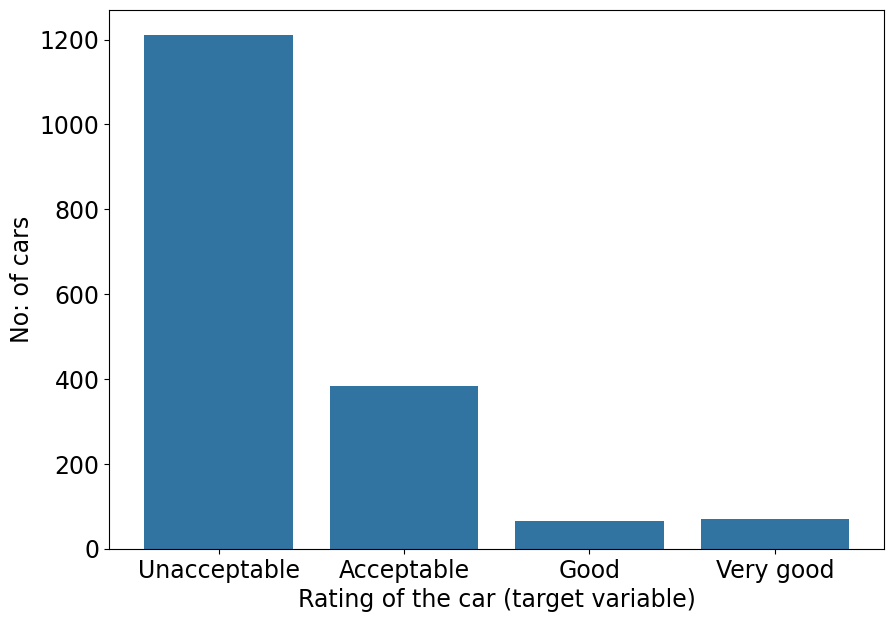

In [17]:
# We set the names of the classes as follows:
# unacc - Unacceptable
# acc   - Acceptable
# good  - Good
# vgood - Very good
target_ratings = ['Unacceptable', 'Acceptable', 'Good', 'Very good']

ax = sns.countplot(data = df, x = 'target')
ax.set_xlabel('Rating of the car (target variable)')
ax.set_ylabel('No: of cars')
ax.set_xticklabels(target_ratings)
plt.autoscale()
plt.savefig("Figures/target_dist.png", bbox_inches = "tight")

<ipython-input-18-de9880c915e0>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(buying_price)


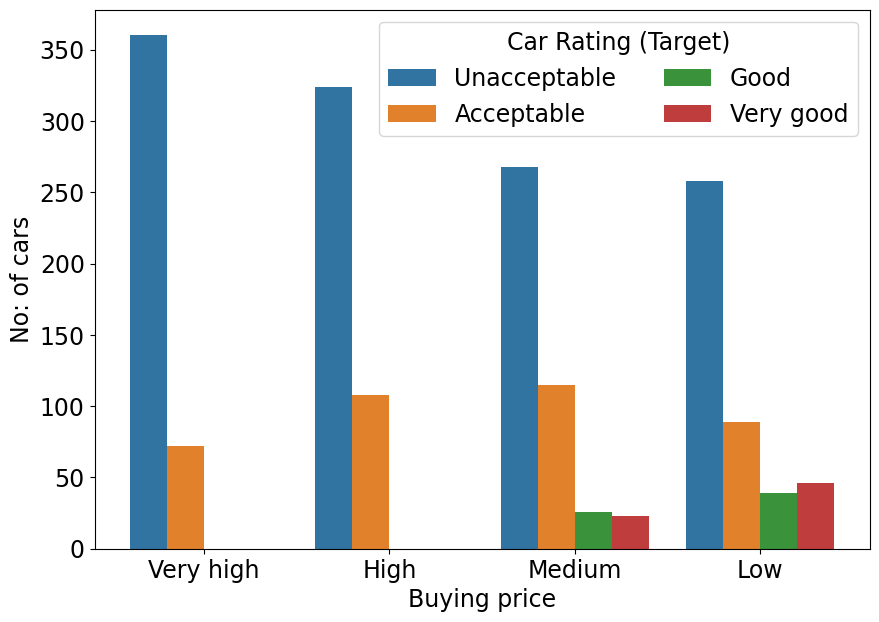

In [18]:
buying_price = ['Very high', 'High', 'Medium', 'Low']

ax = sns.countplot(data = df, x = 'buying', hue = 'target')
ax.set_xlabel('Buying price')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(buying_price)
plt.autoscale()
plt.savefig("Figures/bp.png", bbox_inches = "tight")

<ipython-input-19-db62aed898fc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(maintain_price)


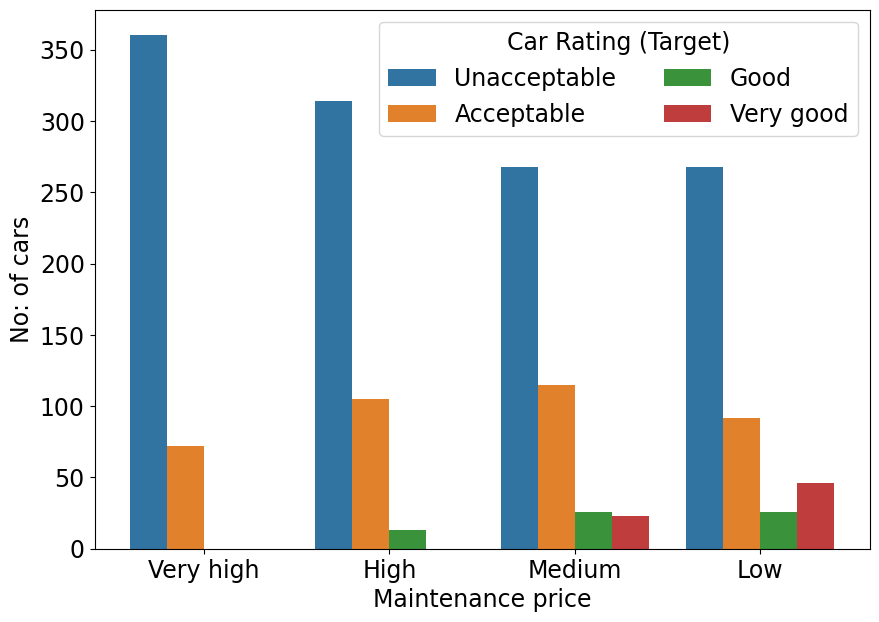

In [19]:
maintain_price = ['Very high', 'High', 'Medium', 'Low']

ax = sns.countplot(data = df, x = 'maint', hue = 'target')
ax.set_xlabel('Maintenance price')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(maintain_price)
plt.autoscale()
plt.savefig("Figures/mp.png", bbox_inches = "tight")

<ipython-input-20-02d05ae444da>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(door_count)


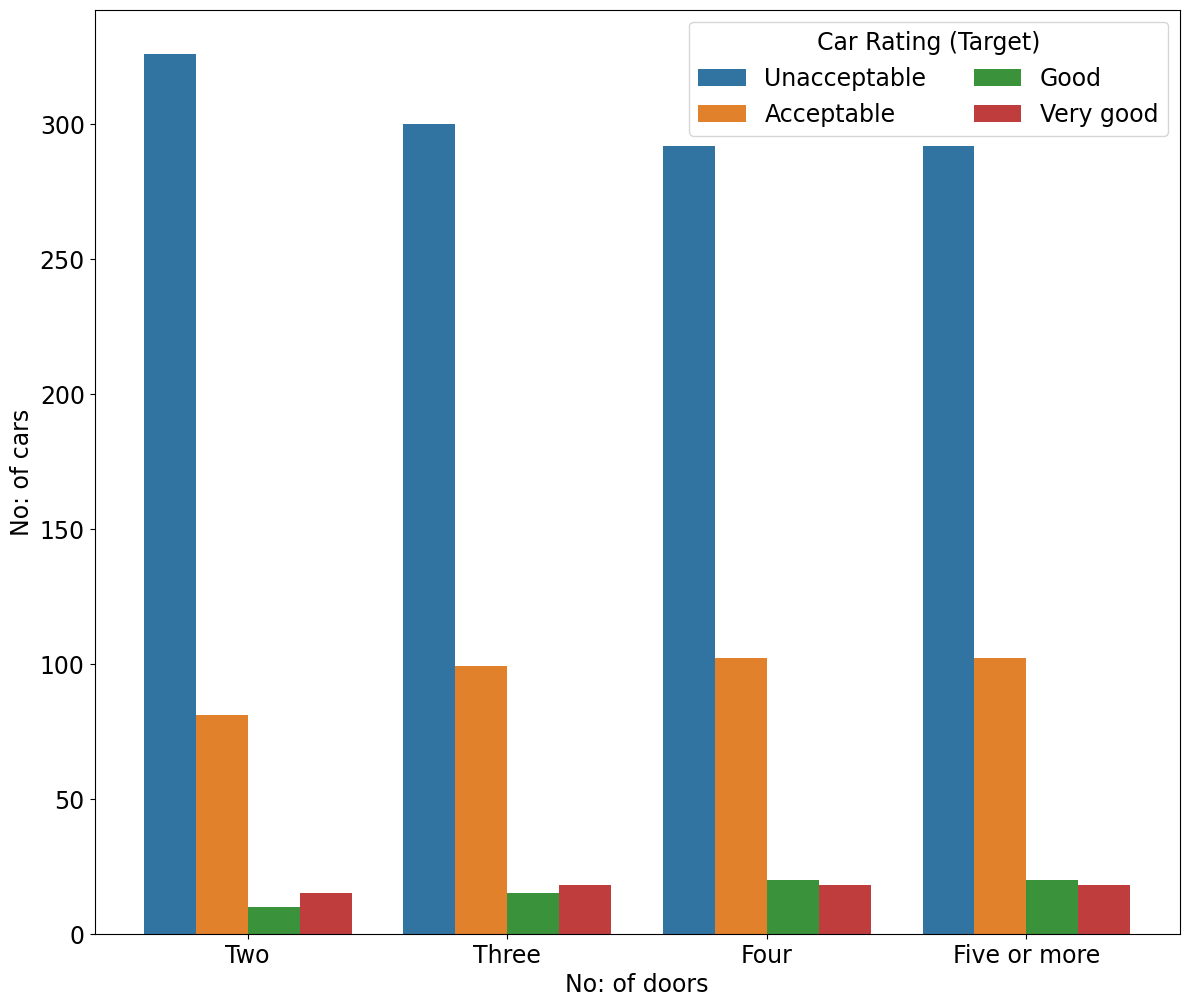

In [20]:
door_count = ["Two", 'Three', 'Four', 'Five or more']

plt.figure(figsize = (14, 12))
ax = sns.countplot(data = df, x = 'doors', hue = 'target')
ax.set_xlabel('No: of doors')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(door_count)
plt.autoscale()
plt.savefig("Figures/nd.png", bbox_inches = "tight")

The distribution is similar for all categories of the variable respresenting the number of doors. This implies that no:of doors is not really a deciding factor as far as rating is concerned.

#### Passenger capacity

<ipython-input-21-8ab7bc6e9eb0>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(capacity)


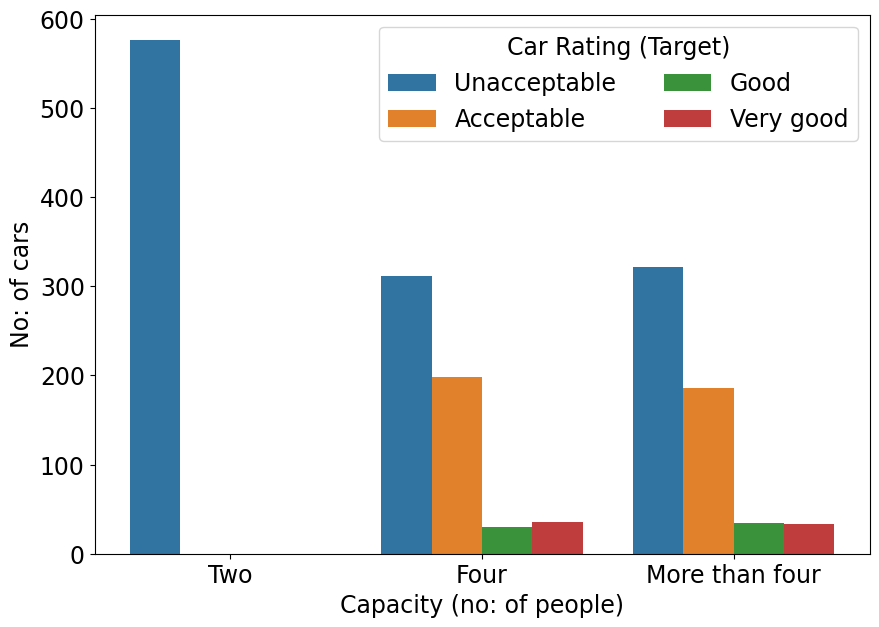

In [21]:
capacity = ['Two', 'Four', 'More than four']

ax = sns.countplot(data = df, x = 'persons', hue = 'target')
ax.set_xlabel('Capacity (no: of people)')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(capacity)
plt.autoscale()
plt.savefig("Figures/cp.png", bbox_inches = "tight")

Observations:
- Cars that can accomodate only two people are all unacceptable
- Cars which can accomodate four and more than four have similar distriubtions

Intuitively, it seems fair that people find only cars which have atleast 4 seats to be acceptable.

#### Size of luggage boot

<ipython-input-22-b3856331ee99>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(boot_size)


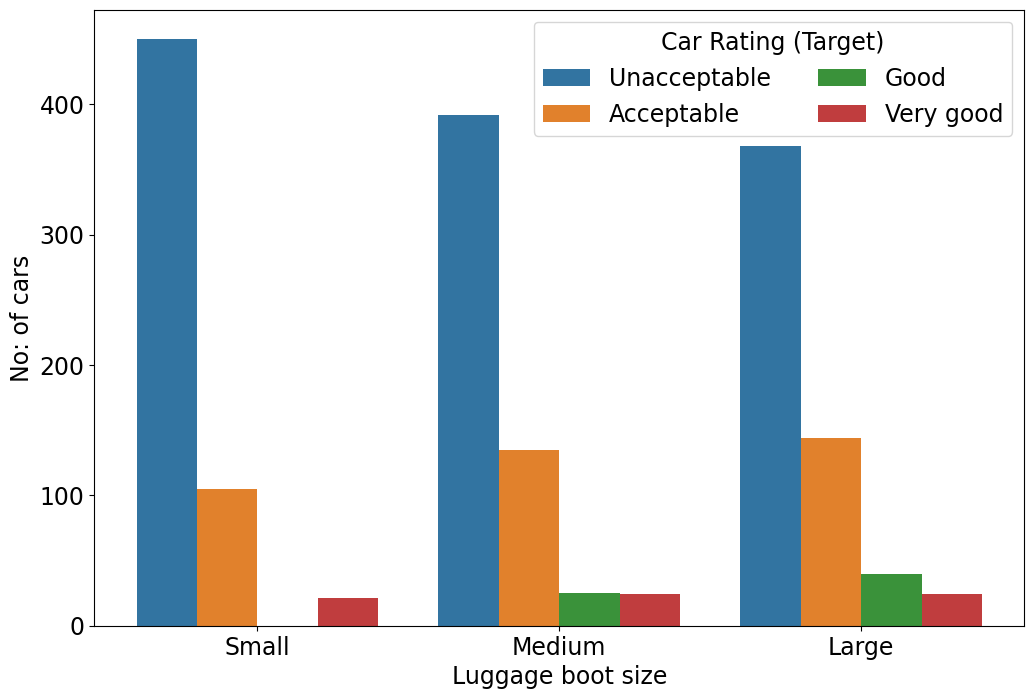

In [22]:
boot_size = ['Small', 'Medium', 'Large']

plt.figure(figsize = (12, 8))
ax = sns.countplot(data = df, x = 'lug_boot', hue = 'target')
ax.set_xlabel('Luggage boot size')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(boot_size)
plt.autoscale()
plt.savefig("Figures/lgp.png", bbox_inches = "tight")

We observe that small-sized luggage boot has a relatively larger proportion of unacceptbale cars, which is what we expect inuitively anyway.

#### Safety rating

<ipython-input-23-0204555123b8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(safety_lvl)


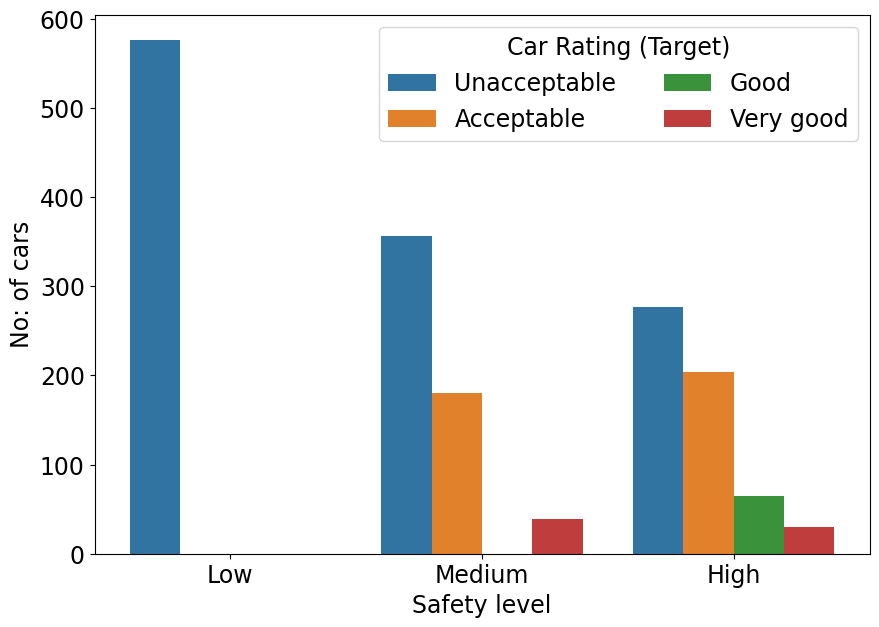

In [23]:
safety_lvl = ['Low', 'Medium', 'High']

ax = sns.countplot(data = df, x = 'safety', hue = 'target')
ax.set_xlabel('Safety level')
ax.set_ylabel('No: of cars')
ax.legend(target_ratings, ncol = 2, title = 'Car Rating (Target)')
ax.set_xticklabels(safety_lvl)
plt.autoscale()
plt.savefig("Figures/sfp.png", bbox_inches = "tight")

Observations:
- All low safety cars are unacceptable
- As safety level increases, proportion of unacceptbale cars decreases

Again this makes sense intuitively as people would prefer cars with high safety levels over low safety levels.

### Encoding the variables

Since all the variables are categorical, it is necessary to encode them.

We note that all the variables have an inherent ordering. Hence, it makes sense to use ordinal encoding.

In [25]:
# Buying price
bp_labels = {'low':0, 'med':1, 'high':2, 'vhigh':3}

# Maintenance price
mp_labels = {'low':0, 'med':1, 'high':2, 'vhigh':3}

# No: of doors
door_labels = {2:0, 3:1, 4:2, "5more":3}

# Passenger capacity
capacity_labels = {2:0, 4:1, 'more':2}

# Luggage boot size
boot_labels = {'small':0, 'med':1, 'big':2}

# Safety level
safety_labels = {'low':0, 'med':1, 'high':2}

# Target
target_labels = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

We perform label encoding:

In [26]:
df['buying'] = df['buying'].map(bp_labels)
df['maint'] = df['maint'].map(mp_labels)
df['doors'] = df['doors'].map(door_labels)
df['persons'] = df['persons'].map(capacity_labels)
df['lug_boot'] = df['lug_boot'].map(boot_labels)
df['safety'] = df['safety'].map(safety_labels)
df['target'] = df['target'].map(target_labels)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   target    1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


### Splitting dataset into training, validation and test sets

In [28]:
X = df.drop('target', axis = 1)
y = df['target']

Train - (Val+Test) split:

In [29]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

We ensure that target class proportion is preserved.

In [31]:
(y_train == 0).sum()/len(y_train)

0.7007722007722008

In [32]:
(y_val_test == 0).sum()/len(y_val_test)

0.6994219653179191

Val - Test split:

In [34]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 42, stratify = y_val_test)

We ensure that target class proportion is preserved.

In [35]:
(y_val == 0).sum()/len(y_val)

0.6994219653179191

In [36]:
(y_test == 0).sum()/len(y_test)

0.6994219653179191

Displaying the dimensions:


In [37]:
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (1036, 6)
Validation set: (346, 6)
Test set: (346, 6)


Making a combined training set for use after validation:

In [38]:
X_train_full = pd.concat([X_train, X_val])
y_train_full = np.concatenate((y_train, y_val),axis= 0)

X_train_full.reset_index(drop = True, inplace  = True)

#### Implementing decision tree

We recall the important observation that the target class does not have a balanced distributions. Hence, it is essential to weigh each class inversly with respect to its freqency. This is done by setting class_weight = 'balanced' in the classifier definition.

#### Model 1

First, we implement an unrestricted tree with no restrictions on the depth or number of nodes.

In [39]:
clf1 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Checking the accuracy:

In [40]:
print('Train Accuracy: ', clf1.score(X_train,y_train)*100)
print('Validation Accuracy: ',clf1.score(X_val, y_val))

Train Accuracy:  100.0
Validation Accuracy:  0.9566473988439307


An accuracy of 100% on training set! Clearly, this indicates overfitting. Let us look at the depth:

In [41]:
print('Tree Depth: ', clf1.get_depth())

Tree Depth:  12


Plotting the tree:

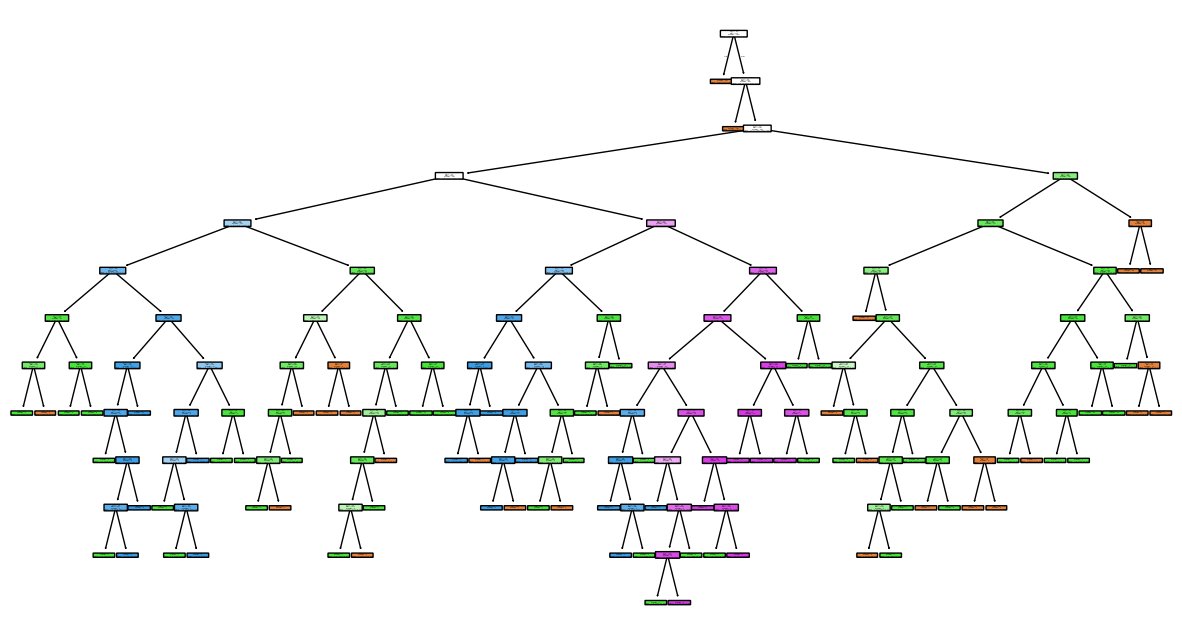

In [42]:
plt.figure(figsize = (15,8))
plot_tree(clf1, rounded = True, filled = True)
plt.show()

Metrics on the validation set:

In [43]:
cr1 = classification_report(y_val, clf1.predict(X_val), output_dict=True)
pd.DataFrame(cr1).loc[:, ['macro avg', 'weighted avg']][:-1]

,macro avg,weighted avg
precision,0.952806,0.956235
recall,0.892324,0.956647
f1-score,0.920520,0.955759


#### Model 2: Controlling depth - Pruning

Typically trees which overfit tend to have more depth than required. We examine the evolution of accuracy v/s depth:

In [44]:
depth_clf = []
depth_list = list(range(1, 13))

for el in depth_list:

    cl = DecisionTreeClassifier(class_weight = 'balanced', max_depth = el, random_state = 42)
    cl.fit(X_train, y_train)

    depth_clf.append(cl)

In [45]:
depth_f1 = [f1_score(clf.predict(X_val), y_val, average = 'weighted') for clf in depth_clf]
print("Highest F1 score for a tree depth = ",depth_list[np.argmax(depth_f1)])

Highest F1 score for a tree depth =  9


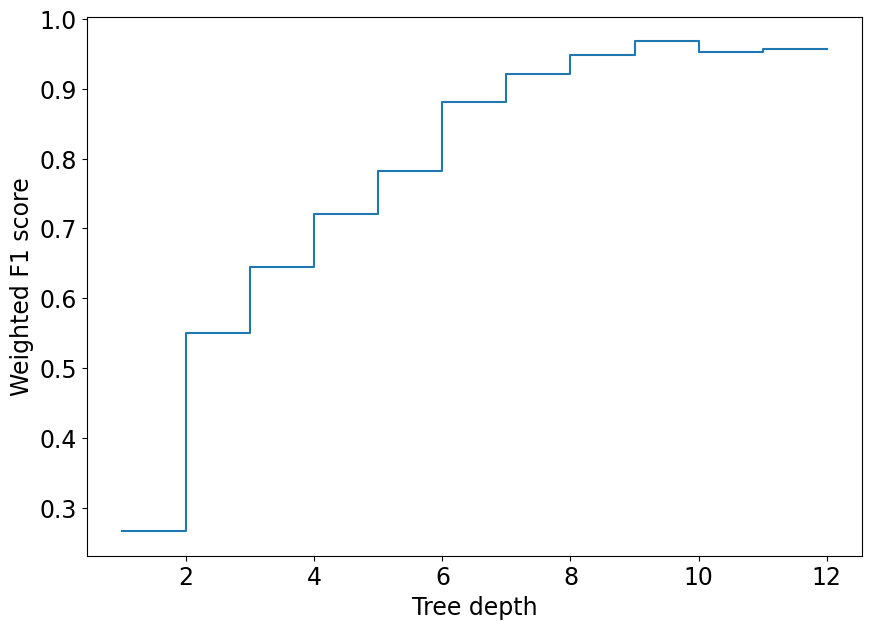

In [46]:
plt.plot(depth_list, depth_f1, drawstyle = 'steps-post')
plt.xlabel("Tree depth")
plt.ylabel("Weighted F1 score")
plt.savefig("Figures/depth_f1.png")

We obtain highest validation accuracy for depth = 9.
Let us check the statistics for this model:

In [47]:
clf2 = depth_clf[np.argmax(depth_f1)]

In [48]:
cr2 = classification_report(y_val, clf2.predict(X_val), output_dict=True)
pd.DataFrame(cr2).loc[:, ['macro avg', 'weighted avg']][:-1]

,macro avg,weighted avg
precision,0.900138,0.971120
recall,0.951889,0.968208
f1-score,0.921115,0.968381


Clearly, this model outperforms model 1.

#### Model 3: Bagging

We check if instead of pruning, bagging on a large number of trees can improve performance:

We create a class for bagged trees:

In [49]:
# Performing bagging of decision trees
# B                - No: of trees to be considered
# train_fraction   - Fraction of the training set which should be randomly sampled for each tree


class Bagged:

    def __init__(self, B, train_fraction):

        self.train_fraction = train_fraction
        self.B = B

    def fit(self, df_train):

        self.bag = list()
        n_size = int(len(df_train) * self.train_fraction)

        for i in range(self.B):

            # Perform random sampling of training data
            train_data = resample(df_train, n_samples = n_size)
            train_data.reset_index(drop = True, inplace = True)

            # Fit the tree
            model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
            model.fit(train_data.drop('target',axis = 1), train_data['target'])

            self.bag.append(model)


    def predict(self,X):

        pred_arr = []
        for clf in self.bag:
            pred_arr.append(clf.predict(X))

        # Take themost voted class as the predition
        bag_pred = stats.mode(pred_arr, axis = 0)[0]
        bag_pred = bag_pred.reshape(-1,1)

        return bag_pred

    def score(self,X,y):

        return accuracy_score(y, self.predict(X))

    def returnbag(self):

        return self.bag

In [50]:
df_train = X_train.copy()
df_train['target'] = y_train

We fix the fraction to be used in bootstrapping to 0.5.
We vary the no: of trees and compare the weighted f1 score:

In [51]:
frac = 0.5
B_vals = list(range(10, 150, 20))
B_clf = []

for B in B_vals:

    clf = Bagged(B, frac)
    clf.fit(df_train)

    B_clf.append(clf)

In [55]:
B_f1 = [f1_score(clf.predict(X_val), y_val, average = 'weighted') for clf in B_clf]
print("Highest f1 score for no: of trees = ", B_vals[np.argmax(B_f1)])

Highest f1 score for no: of trees =  90


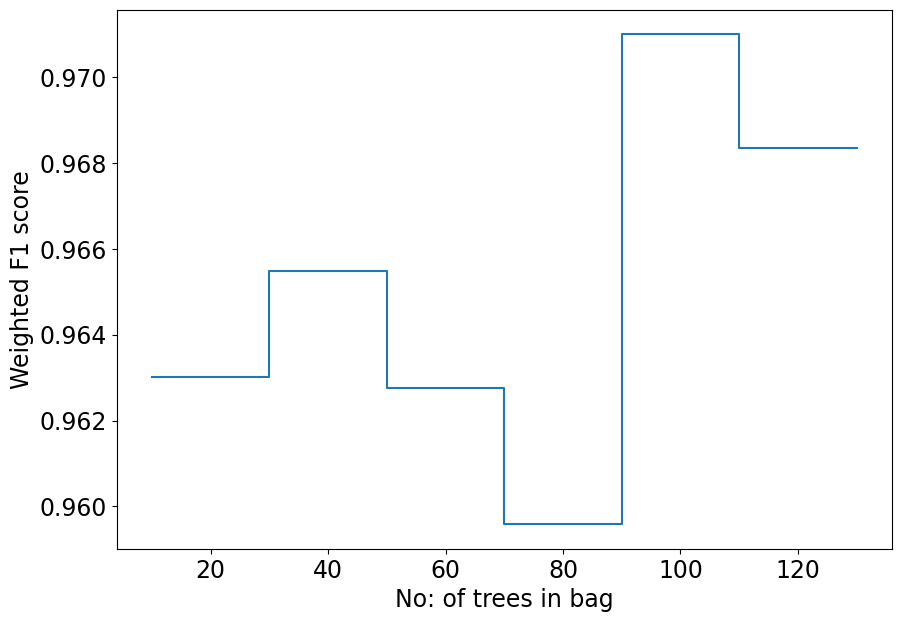

In [56]:
plt.plot(B_vals, B_f1, drawstyle = 'steps-post')
plt.xlabel("No: of trees in bag")
plt.ylabel("Weighted F1 score")
plt.savefig("Figures/b_f1.png")

In [57]:
clf3 = B_clf[np.argmax(B_f1)]

Evaluating the performance:

In [58]:
cr3 = classification_report(y_val, clf3.predict(X_val), output_dict=True)
pd.DataFrame(cr3).loc[:, ['macro avg', 'weighted avg']][:-1]

,macro avg,weighted avg
precision,0.928320,0.971442
recall,0.947166,0.971098
f1-score,0.937398,0.971200


Although this performs well, model 2 is better. So we choose the pruned model as the final model.

We train it on the whole training data:

In [59]:
clf_best = DecisionTreeClassifier(class_weight = 'balanced', max_depth = np.argmax(depth_f1), random_state = 42)
clf_best.fit(X_train_full, y_train_full)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

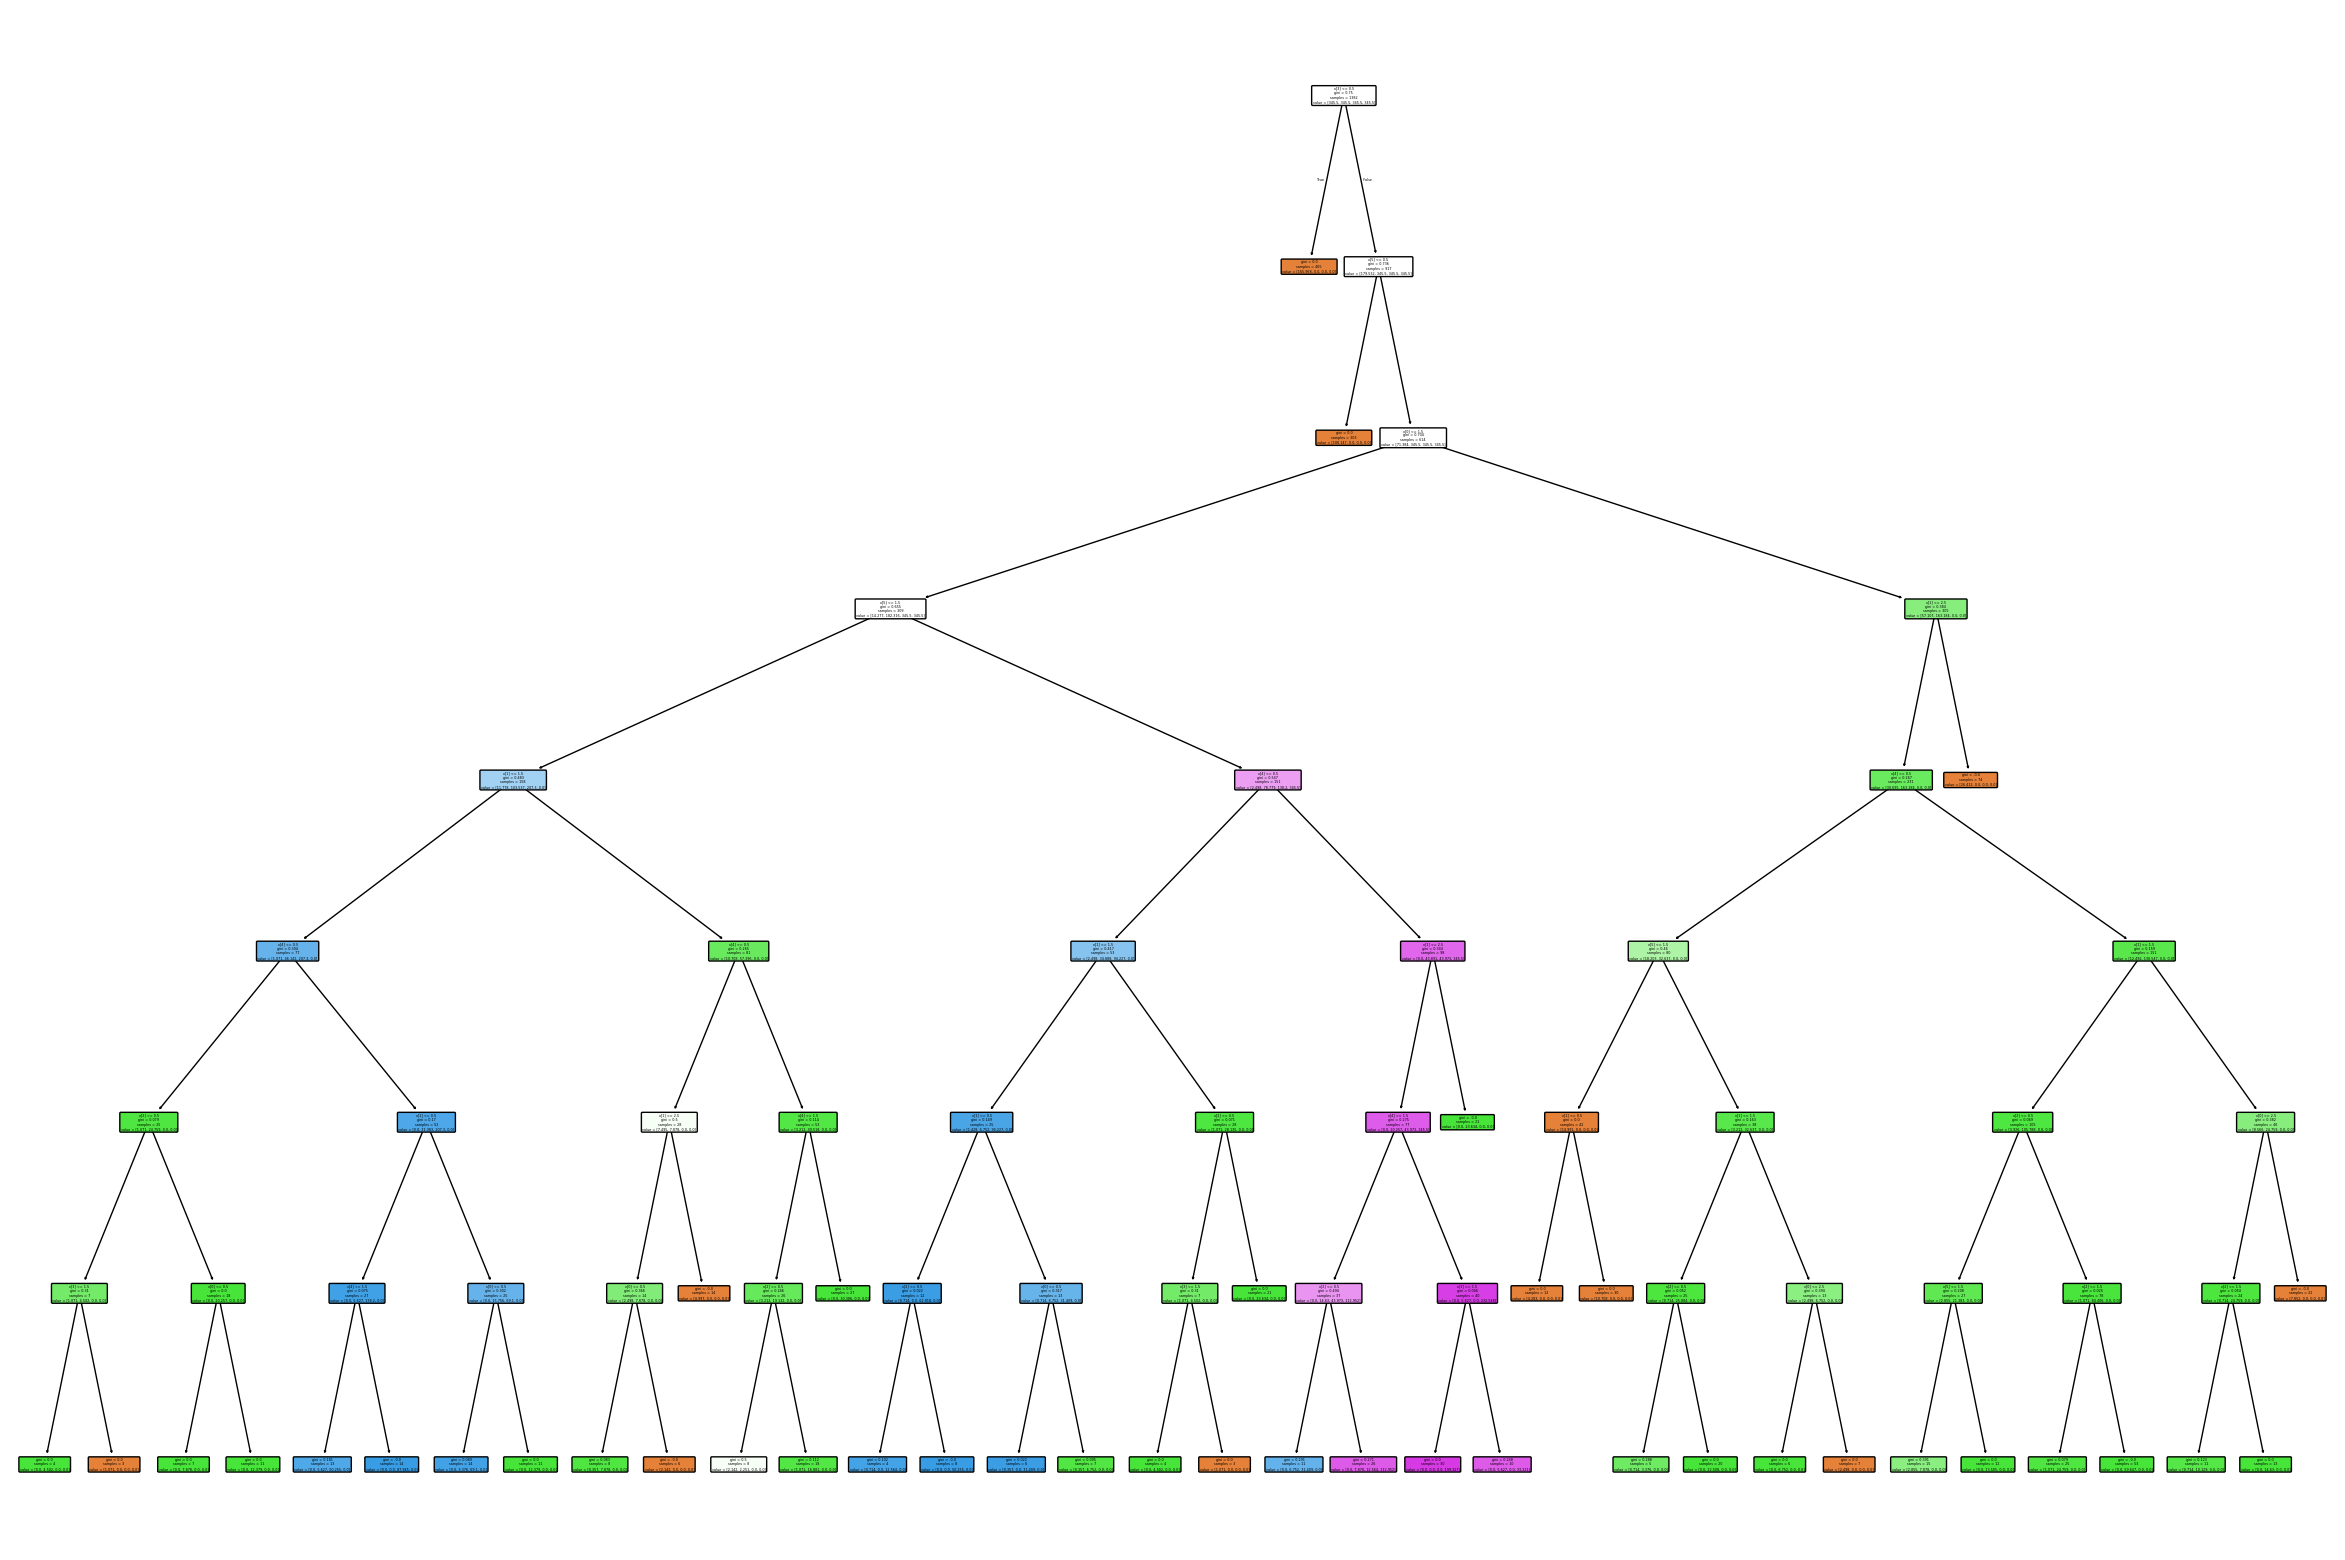

<Figure size 1000x700 with 0 Axes>

In [60]:
plt.figure(figsize = (30,20))
plot_tree(clf_best, rounded = True, filled = True)
plt.show()
plt.savefig("Figures/lol.png")

Metrics and Confusion matrix for final model:

In [61]:
cr_final = classification_report(y_test, clf_best.predict(X_test), output_dict=True)
pd.DataFrame(cr_final).loc[:, ['macro avg', 'weighted avg']][:-1]

,macro avg,weighted avg
precision,0.896465,0.972222
recall,0.960744,0.968208
f1-score,0.922977,0.969298


In [66]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

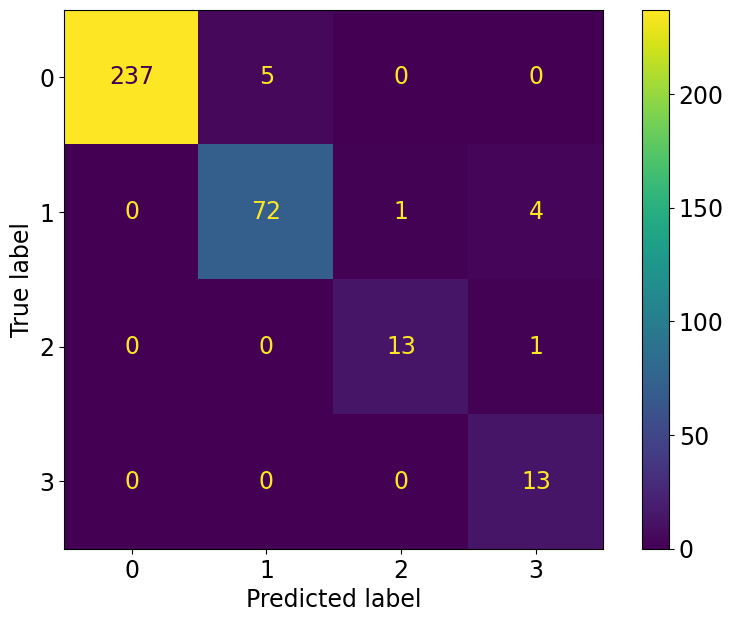

In [69]:
   cm = confusion_matrix(y_test, clf_best.predict(X_test))
   disp = ConfusionMatrixDisplay(confusion_matrix=cm)
   disp.plot()
   plt.show()

We can see the importance of features through feature importance scores:

In [70]:
feature_scores = pd.Series(clf_best.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.263699
maint       0.189718
lug_boot    0.179121
buying      0.171911
persons     0.153082
doors       0.042468
dtype: float64


Safety is the most important feature, whereas no: of doors is the least important feature, which agrees with our initial exploratory analysis

<ipython-input-71-a79d86afe7dc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Safety Rating', 'Maintanence Cost', 'Luggage boot size', 'Buying price', 'Passenger capacity', 'No: of doors'])


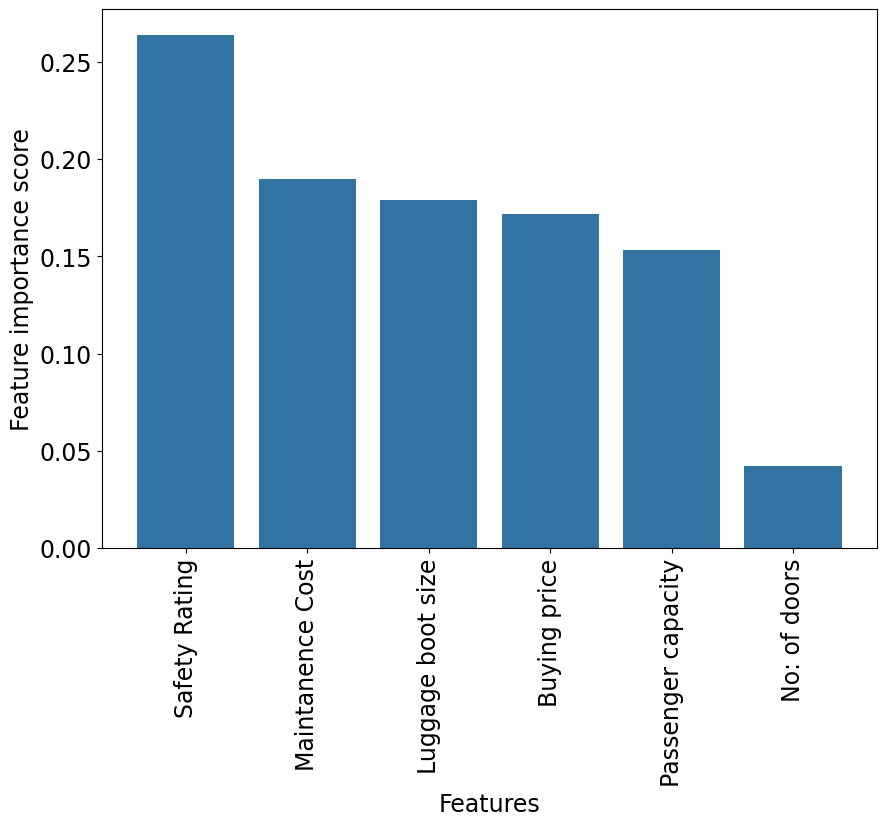

In [71]:
ax = sns.barplot(x = feature_scores.index, y = feature_scores, orient='v')
ax.set_xlabel('Features')
ax.set_ylabel('Feature importance score')
ax.set_xticklabels(['Safety Rating', 'Maintanence Cost', 'Luggage boot size', 'Buying price', 'Passenger capacity', 'No: of doors'])
plt.xticks(rotation = 90)
plt.grid(False)
plt.autoscale()
plt.savefig('Figures/feature_imp.png', bbox_inches = "tight")

### Benchmarking using XGBoost

In [72]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Parameter space for searching for xgboost:

In [73]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [1.0],
        'max_depth': [4, 5, 6]
        }

In [74]:
xgb = XGBClassifier(learning_rate = 0.02, n_estimators = 1000, objective='binary:logistic',
                 nthread=1)

In [75]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10)

random_search = GridSearchCV(estimator = xgb, param_grid=params,  scoring='f1_weighted', n_jobs=-1, cv=skf.split(X_train_full,y_train_full), verbose=3)

start_time = timer(None)
random_search.fit(X_train_full, y_train_full)
timer(start_time)

Fitting 3 folds for each of 135 candidates, totalling 405 fits

 Time taken: 0 hours 3 minutes and 25.63 seconds.


In [76]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)


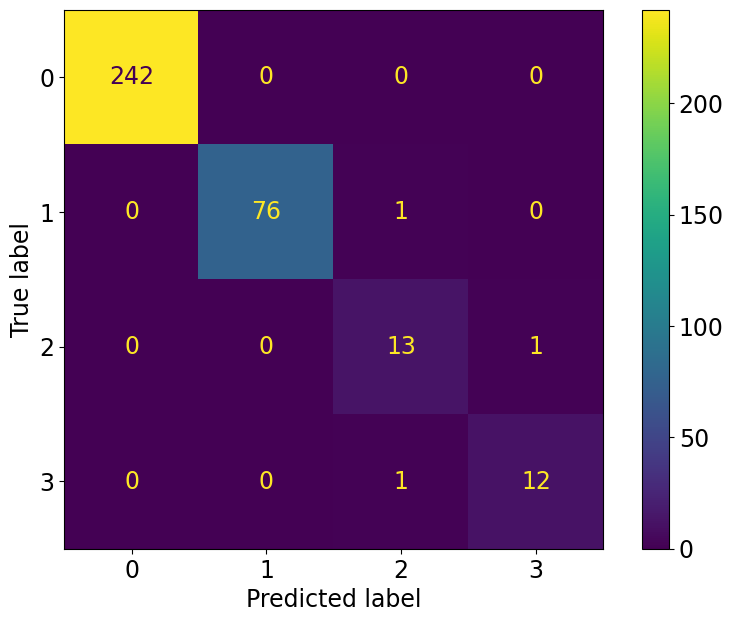

In [78]:
# plot_confusion_matrix(random_search, X_test, y_test)
# plt.grid(False)
# plt.savefig('Figures/cfmatrix_xg.png')

cm = confusion_matrix(y_test, random_search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [79]:
cr_xg = classification_report(y_test, random_search.predict(X_test), output_dict=True)
pd.DataFrame(cr_xg).loc[:, ['macro avg', 'weighted avg']][:-1]

,macro avg,weighted avg
precision,0.947436,0.991715
recall,0.959665,0.991329
f1-score,0.953273,0.991470


from matplotlib import pyplot as plt
_df_0['macro avg'].plot(kind='hist', bins=20, title='macro avg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weighted avg'].plot(kind='hist', bins=20, title='weighted avg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='macro avg', y='weighted avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['macro avg'].plot(kind='line', figsize=(8, 4), title='macro avg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['weighted avg'].plot(kind='line', figsize=(8, 4), title='weighted avg')
plt.gca().spines[['top', 'right']].set_visible(False)

In [80]:
feat_scores = random_search.best_estimator_.get_booster().get_score()
inv_dict = {}

for key, val in feat_scores.items():
    inv_dict[val] = key

feat_names = list(inv_dict.keys())
feat_names = sorted(feat_names)[::-1]

<ipython-input-81-55fee6225b01>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Buying price',  'Maintanence Cost', 'Safety Rating', 'Luggage boot size', 'Passenger capacity', 'No: of doors'])


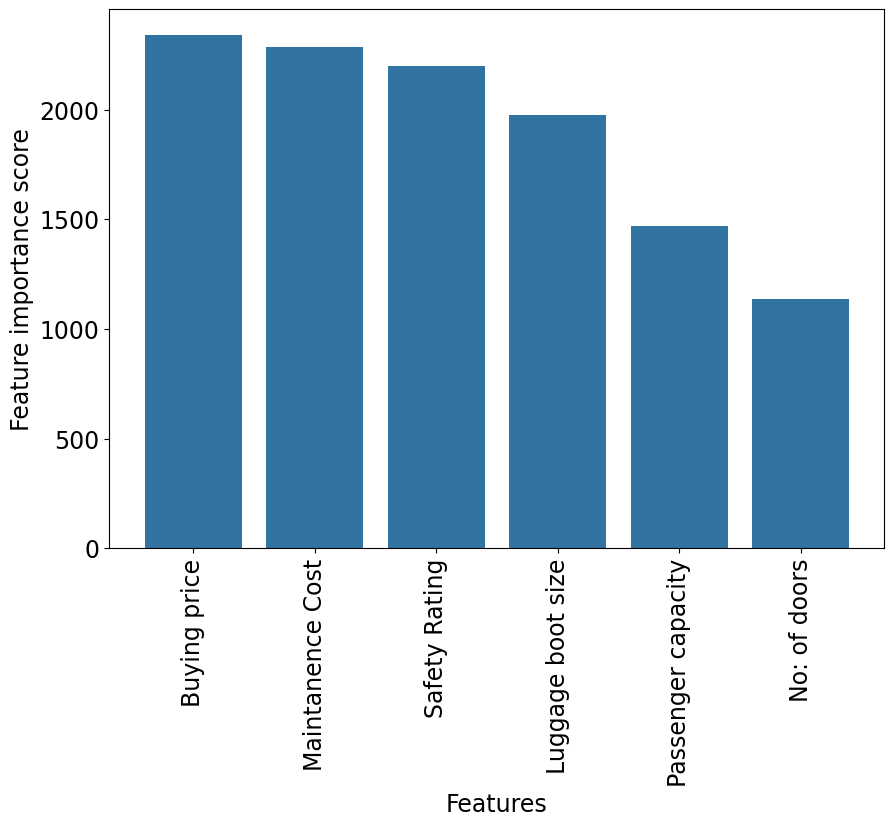

In [81]:
ax = sns.barplot(x = [inv_dict[el] for el in feat_names], y = feat_names, orient='v')
ax.set_xlabel('Features')
ax.set_ylabel('Feature importance score')
ax.set_xticklabels(['Buying price',  'Maintanence Cost', 'Safety Rating', 'Luggage boot size', 'Passenger capacity', 'No: of doors'])
plt.xticks(rotation = 90)
plt.grid(False)
plt.autoscale()
plt.savefig('Figures/feature_imp_xg.png', bbox_inches = "tight")